In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # makes the charts pretty
# imports libraries needed to manipulate the dataset

In [63]:
#OPENING AND READING OF DATA SET

In [64]:
loans =pd.read_csv("Cost_of_Loans.csv")
#this input/output operation Reads a comma-separated values (csv) file 

In [65]:
# UNDERSTANDING THE DATA SET

In [66]:
loans.shape
# this function Returns a tuple (finite ordered list/sequence of elements) representing the dimensionality of the Dataset.

(87, 2)

In [67]:
loans.dtypes
# This function looks at the data type of each column. 

Loan    object
Date    object
dtype: object

In [68]:
loans.head()
# This function returns the first 5 rows for the object based on position. 
#It is useful for quickly testing if your object has the right type of data in it.

,Loan,Date
0,"2,879,837.15",NaN
1,"2,891,268.25",NaN
2,"2,691,268.25",NaN
3,2741822.65,30/08/2019
4,2760952.5,19/9/2019


In [69]:
loans.tail()
# This function returns last 5 rows from the object based on position. It is useful for quickly verifying data.

,Loan,Date
82,"387,826.70",29/09/2021
83,"388,525.85",4/10/2021
84,"288,525.85",4/10/2021
85,"288,733.30",6/10/2021
86,"188,733.30",6/10/2021


In [70]:
loans.columns.values
# this function returns an array of column names

array(['Loan', 'Date'], dtype=object)

In [71]:
loans.columns.values.tolist()
# this function returns a list of column names

['Loan', 'Date']

In [ ]:
# MANAGING DATA IN THE DATASET

In [9]:
loans.info
# This function prints information about a Dataset including the index dtype and columns, non-null values and memory usage.

<bound method DataFrame.info of             Loan        Date
0   2,879,837.15         NaN
1   2,891,268.25         NaN
2   2,691,268.25         NaN
3     2741822.65  30/08/2019
4      2760952.5   19/9/2019
..           ...         ...
82    387,826.70  29/09/2021
83    388,525.85   4/10/2021
84    288,525.85   4/10/2021
85    288,733.30   6/10/2021
86    188,733.30   6/10/2021

[87 rows x 2 columns]>

In [10]:
loans['Date'] =loans['Date'].apply(pd.to_datetime)
# this method converts the specified column to_datetime

In [22]:
loans['Loan'] = loans['Loan'].str.replace(',','')
# this method replaces a specified phrase with another specified phrase.

In [23]:
loans['Loan'] =loans['Loan'].astype(float)
# .astype Casts a pandas object to a specified datatype dtype.

In [24]:
loans.set_index( 'Date' ,inplace = True )
# this function Sets the Dataset index using existing columns.
# in this case we are converting the Date column into the Dataset index column

In [27]:
loans.info

<bound method DataFrame.info of                   Loan
Date                  
NaT         2879837.15
NaT         2891268.25
NaT         2691268.25
2019-08-30  2741822.65
2019-09-19  2760952.50
...                ...
2021-09-29   387826.70
2021-04-10   388525.85
2021-04-10   288525.85
2021-06-10   288733.30
2021-06-10   188733.30

[87 rows x 1 columns]>

In [30]:
loans.dropna()
# this function drops all rows with columsn having null data

,Loan
Date,
NaT,2879837.15
NaT,2891268.25
NaT,2691268.25
2019-08-30,2741822.65
2019-09-19,2760952.50
...,...
2021-09-29,387826.70
2021-04-10,388525.85
2021-04-10,288525.85


In [60]:
loans.isnull().sum()
# This fucntion returns the number of missing values in the data set. 

Loan    0
dtype: int64

In [77]:
# CREATING GRAPHICAL DISPLAYS OF THE DATA SET

Text(0.5, 1.0, 'Loans and Date Graph')

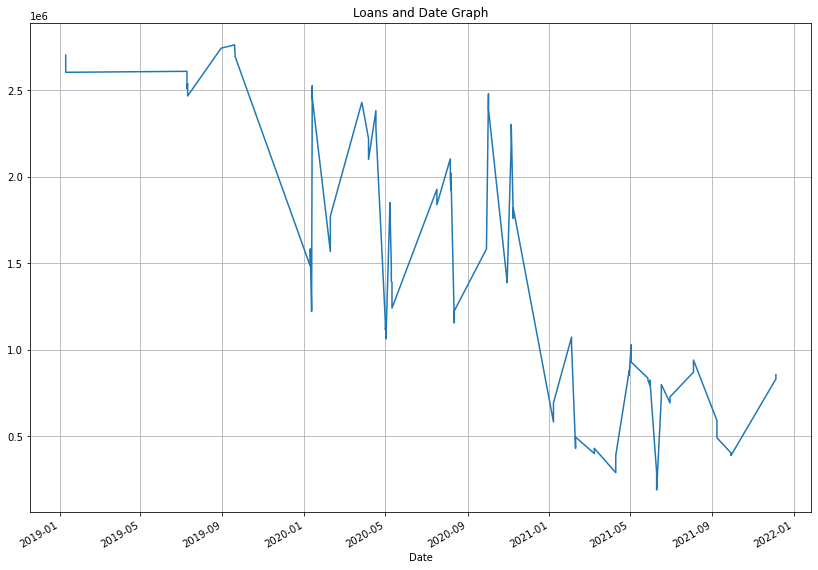

In [44]:
plt.rcParams[ 'figure.figsize' ] = ( 14 , 10 ) # this matplot library sets the figures to be large in size
loans[ 'Loan' ].plot(grid = True) # this method plots the graphic representation and configures the grid lines
plt.title( 'Loans and Date Graph' )  # this set the title of the graphic representation

In [41]:
loans.resample(rule = 'A' ).mean()
# this method resamples time-series data
# it is a Convenience method for frequency conversion and resampling of time series. 

,Loan
Date,
2019-12-31,2.624097e+06
2020-12-31,1.770754e+06
2021-12-31,6.731905e+05


Text(0.5, 1.0, 'Yearly Maximum Loan Price')

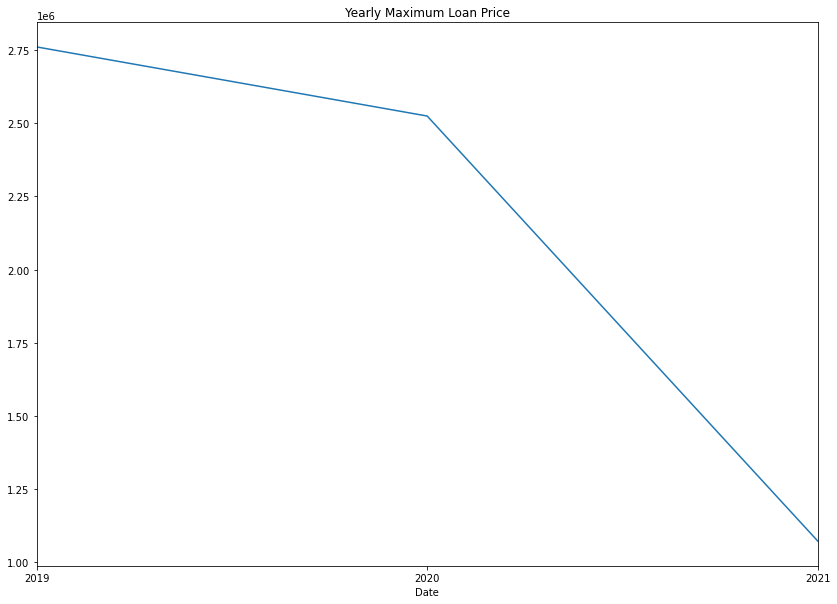

In [43]:
plt.rcParams[ 'figure.figsize' ] = ( 14 , 10 ) 
loans[ 'Loan' ].resample( 'A' ). max ().plot(kind = 'line' ) #this method represents resampled data and changes the plot kind
# uses a frequency offset of A which is set to right
plt.title( 'Yearly Maximum Loan Price' )

In [ ]:
# FURTHER DATA MANAGEMENT

In [88]:
loans.reset_index(inplace=True)
# this function converts the dateindex column back to a normal column

In [89]:
loans.head()

,level_0,index,Loan,Date
0,0,0,"2,879,837.15",NaN
1,1,1,"2,891,268.25",NaN
2,2,2,"2,691,268.25",NaN
3,3,3,2741822.65,30/08/2019
4,4,4,2760952.5,19/9/2019


In [90]:
loans.isnull().sum()
# this function displays the sum of all null values in the data set

level_0    0
index      0
Loan       0
Date       3
dtype: int64

In [91]:
loans[loans['Date'].isnull()]
# this function displays in detail the rows in the dataset containing null values

,level_0,index,Loan,Date
0,0,0,"2,879,837.15",NaN
1,1,1,"2,891,268.25",NaN
2,2,2,"2,691,268.25",NaN


In [92]:
loans.drop(loans.index[[0,1,2]], inplace=True)
# this function drops the null values in the dataset using  their index

In [95]:
loans.info

<bound method DataFrame.info of     level_0  index        Loan        Date
3         3      3  2741822.65  30/08/2019
4         4      4   2760952.5   19/9/2019
5         5      5  2691884.55  20/09/2019
6         6      6   2702387.2   1/10/2019
7         7      7   2602387.2   1/10/2019
..      ...    ...         ...         ...
82       82     82  387,826.70  29/09/2021
83       83     83  388,525.85   4/10/2021
84       84     84  288,525.85   4/10/2021
85       85     85  288,733.30   6/10/2021
86       86     86  188,733.30   6/10/2021

[84 rows x 4 columns]>